In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bike = pd.read_csv('bike_train.csv')

In [4]:
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
bike['datetime'] = bike.datetime.apply(pd.to_datetime)

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
bike['year'] = bike.datetime.apply(lambda x : x.year)
bike['month'] = bike.datetime.apply(lambda x : x.month)
bike['day'] = bike.datetime.apply(lambda x : x.day)
bike['hour'] = bike.datetime.apply(lambda x : x.hour)

In [12]:
bike.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0


In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [14]:
bike.drop(columns=['datetime','casual','registered'],inplace=True)

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle
def evaluate_regr(y,pred):
    rmsle_val =rmsle(y,pred)
    rmse_val = mean_squared_error(y,pred,squared=False)
    mae_val = mean_absolute_error(y,pred)
    print(f'rmsle:{rmsle_val}, rmse:{rmse_val}, mae:{mae_val}')

In [16]:
x = 45
np.log1p(x)

3.828641396489095

In [17]:
np.expm1(3.828641396489095)

45.0

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

In [23]:
y = bike['count']
x = bike.drop(columns='count')
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test,pred)

rmsle:1.1646636237108705, rmse:140.8995886716558, mae:105.92444835101169


In [24]:
def get_top_error_data(y_test,pred,n_tops=5):
    result_df = pd.DataFrame(y_test.values,columns=['real_count'])
    result_df['pred_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']- result_df['pred_count'])
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

In [25]:
get_top_error_data(y_test,pred,n_tops=5)

      real_count  pred_count   diff
1618         890       322.0  568.0
3151         798       241.0  557.0
966          884       327.0  557.0
412          745       194.0  551.0
2817         856       310.0  546.0


<Axes: >

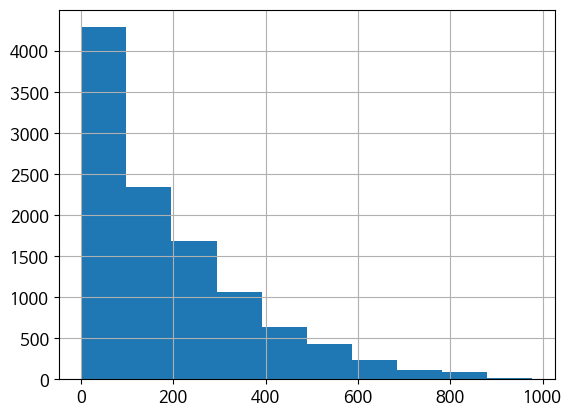

In [26]:
y.hist()

In [27]:
y_log = np.log1p(y)

<Axes: >

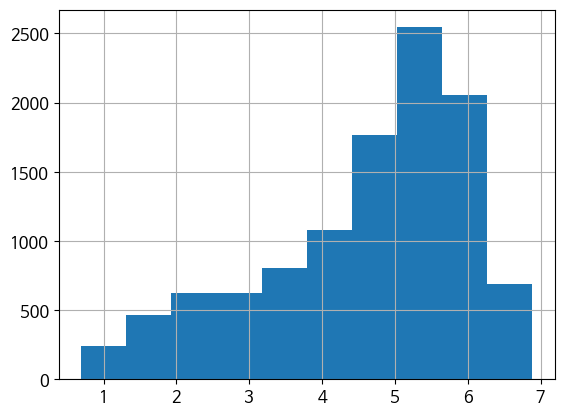

In [28]:
y_log.hist()

In [31]:
X_train,X_test,y_train,y_test = train_test_split(x,y_log,test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
y_test_t = np.expm1(y_test)
pred_t = np.expm1(pred)
evaluate_regr(y_test_t,pred_t)

rmsle:1.016826598200343, rmse:162.59426809004614, mae:109.2861586007754


In [32]:
lr_reg.coef_

array([-0.04452494, -0.04601019, -0.06638329, -0.01473326,  0.01171224,
        0.03085662, -0.01451151,  0.00396076,  0.41851292,  0.07683909,
        0.0033531 ,  0.09834835])

<Axes: >

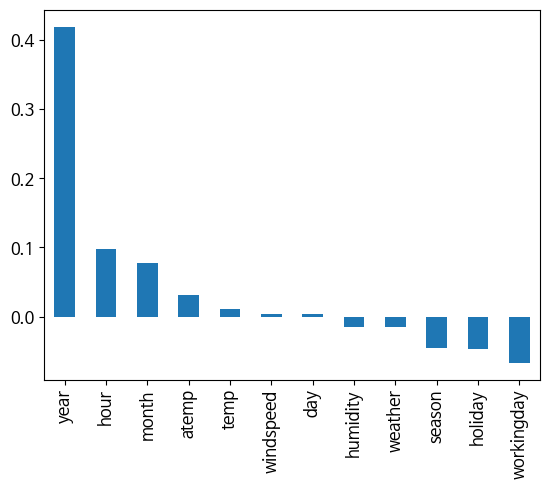

In [38]:
pd.Series(lr_reg.coef_,index=x.columns).sort_values(ascending=False).plot(kind='bar')

In [39]:
x.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [41]:
x_ohe = pd.get_dummies(x,columns=['season', 'holiday', 'workingday', 'weather','year', 'month', 'day', 'hour'])

In [42]:
X_train,X_test,y_train,y_test = train_test_split(x_ohe,y_log,test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)
y_test_t = np.expm1(y_test)
pred_t = np.expm1(pred)
evaluate_regr(y_test_t,pred_t)

rmsle:0.5896346375747998, rmse:97.68804411871898, mae:63.38200887075318


<Axes: >

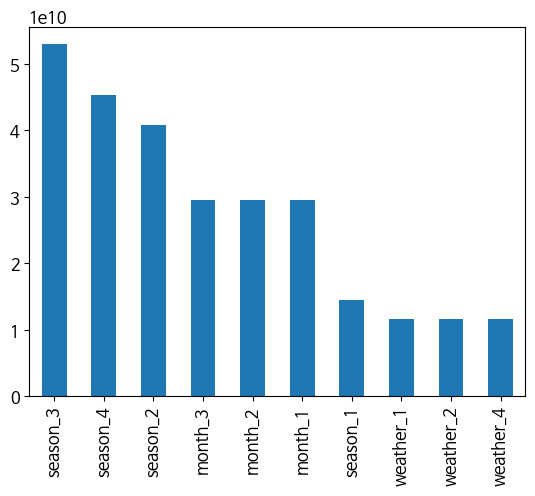

In [45]:
pd.Series(lr_reg.coef_,index=x_ohe.columns).sort_values(ascending=False)[:10].plot(kind='bar')